the import statements includes Tweepy and pandas packages

Pandas is an open source python package that provides numerous tools for data analysis. It provides a number 
of data structures and methods than can be used a vast Variety of data manipulation tasks such as data filtering,
input/output operations  etc. this analysis utilizes the 'DataFrame' data structure.

Tweepy is an easy to use python Library that allows  you to access the Twitter API with Python conveniently.
It includes a set of classes and methods that represent Twitter's API endpoints and models which gives it the 
ability to handle various implementations such as data encoding/decoding, HTTP Requests, Result pagination,
OAuth authentication etc.

In [49]:


import pandas as pd
import tweepy



#Requests are authenticated using OAUth in order to use Twitter API. 
#this requires 4 text strings - consumer key, consumer secret, access token, access secret.


#intialising the Api Keys - note replace the keys with the appropriate values
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'


#This method hanndles the authentication, extracts tweets and returns a dataframe of extracted tweets
def search_for_hashtags(consumer_key, consumer_secret,access_token, access_token_secret, hashtag_phrase):
    

    #tweepy provides an OAuthHandler class that you can use to set the credentials to be used in all API calls
    #creates an OAuthHandler object 'auth' to be used for API calls
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    
    #Creates API object
    api = tweepy.API(auth)
    
    #Tweepy cursors relieves part of the complexity of working with paginated results
    #Creates Cursor object handles fetching the various result pages transparently 
    #items(500) limits the return to 500 items 
    tweets = tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', lang="en", tweet_mode='extended').items(1000)
     
    #Converts a dictionary of the items into a dataframe 'df'
    df = pd.DataFrame(tweet.__dict__ for tweet in tweets)
    
    
    return df   



#initalising the Hashtag to search
hashtag_phrase_2 = '#samsungs20'


#initialize df to the vatiable
hashtag_Lockdown_tweets = search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase_2)




In [50]:
#Path is a class in the python 'path' package that is used to work with files and directories
from path import Path

#Create object of the Path 
path = Path()

#convert dataframe to csv
hashtag_Lockdown_tweets.to_csv(path + "S20.csv")

# for file in path.glob('*.*'):
#     print(file)

This section we analysed tweets that were extracted on Jan 02 2020. This way way we'd know the sentiments of

the public at this time


In [51]:

#Returned Tweets
Lockdown_tweets = pd.read_csv('S20.csv')


#Create a copy of the original dataframe using .copy() function
#This copy will be used for the sentiment Analysis 
hashtag_Lockdown_tweets_copy = Lockdown_tweets.copy()



In [52]:

#Filter the important columns to the Sentiment Analysis
#Utilized loc() method to select all rows of the following 'full_text' column
filtered_df = hashtag_Lockdown_tweets_copy.loc[:,['full_text','retweet_count','favorite_count']]

filtered_df


,full_text,retweet_count,favorite_count
0,Same shot.. black and white version ! \n#ThePh...,4,6
1,Crossing the Ganges ...near Patna city.. the J...,2,7
2,Ireland sometimes looks like a fantasy land. #...,0,1
3,Happy family ❤️ #Dog #SamsungS20 #Ireland #Car...,0,0
4,The Queen of the hill. #SamsungS20 #Carlow #Ir...,0,0
5,Having good fun on the farm. #Carlow #SamsungS...,0,0
6,Some candid clicks... #Blacklove #samsungS20 #...,0,0
7,Shoot for the moon. #nature #countryside #engl...,2,10
8,Beautiful sunrise. No filter needed.\n #photog...,3,15
9,The one problem I have with my new phone... \n...,3,3


In [53]:
#Cleaning the data set to remove URLs, Hashtags, Symbols

#import re 
#the functions in this module let you check if a specific string matches a 
#provided regular expression (or if a provided regular expression matches a specific string).
import re


#This method takes tweets and cleans
def cleanData(text_data):
        #.sub() replaces the first parameter string literal with an empty string5
        text_data = re.sub(r'@[A-za-z0-9]', '' ,text_data)
        text_data = re.sub(r'#', '' ,text_data)
        text_data = re.sub(r'\n', '' ,text_data)
        text_data = re.sub(r'RT[\s]+', '', text_data)
        text_data = re.sub(r'https?:\/\/\S+', '' , text_data)
        text_data = re.sub(r'\[;,'']', '' , text_data)
        complete_emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
        
        text_data = complete_emoji_pattern.sub(r'', text_data)

        return text_data

    
filtered_df['full_text'] = filtered_df['full_text'].apply(cleanData) 



In [54]:
#Displays the first 20 rows of the 'full_text' using the head()

filtered_df.head(20)

,full_text,retweet_count,favorite_count
0,Same shot.. black and white version ! ThePhoto...,4,6
1,Crossing the Ganges ...near Patna city.. the J...,2,7
2,Ireland sometimes looks like a fantasy land. S...,0,1
3,Happy family Dog SamsungS20 Ireland Carlow @ ...,0,0
4,The Queen of the hill. SamsungS20 Carlow Irela...,0,0
5,Having good fun on the farm. Carlow SamsungS20...,0,0
6,Some candid clicks... Blacklove samsungS20 eve...,0,0
7,Shoot for the moon. nature countryside england...,2,10
8,Beautiful sunrise. No filter needed. photograp...,3,15
9,The one problem I have with my new phone... p...,3,3


In [55]:
#imports TextBlob 
#TextBlob is a Python library that is used to process textual data. It provides a API for that performing common 
#natural language processing (NLP) tasks such as part-of-speech tagging, extraction of noun phrase, 
#sentiment analysis, and more.


from textblob import TextBlob

#The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity)


#subjectivity refers that mostly it is a public opinion and not a factual information
#The subjectivity is a float within the range [0.0, 1.0] with 0.0 being very objective and 1.0 is very subjective.
def getTextSubjectivity(text_data):
    return TextBlob(text_data).sentiment.subjectivity


#polarity refers to whether the sentiment is positive, negativeor neutrak
#The polarity score is a float within the range [-1.0, 1.0].
def getTextPolarity(text_data):
    return TextBlob(text_data).sentiment.polarity



#apply() used to apply the method to to each entry 
filtered_df['subjectivity'] = filtered_df['full_text'].apply(getTextSubjectivity)
filtered_df['polarity'] = filtered_df['full_text'].apply(getTextPolarity)


#Categorise tweets into negative, neutral, positive using Polarity
def getSentimentAnalysis(grade):
    if grade < 0:
        return 'Negative'
    elif grade == 0:
        return 'Neutral'
    else:
        return 'Positive'

filtered_df['analysis'] = filtered_df['polarity'].apply(getSentimentAnalysis)




In [56]:
filtered_df.head(20)

,full_text,retweet_count,favorite_count,subjectivity,polarity,analysis
0,Same shot.. black and white version ! ThePhoto...,4,6,0.186111,-0.055556,Negative
1,Crossing the Ganges ...near Patna city.. the J...,2,7,1.000000,1.000000,Positive
2,Ireland sometimes looks like a fantasy land. S...,0,1,0.000000,0.000000,Neutral
3,Happy family Dog SamsungS20 Ireland Carlow @ ...,0,0,1.000000,0.800000,Positive
4,The Queen of the hill. SamsungS20 Carlow Irela...,0,0,0.000000,0.000000,Neutral
5,Having good fun on the farm. Carlow SamsungS20...,0,0,0.400000,0.500000,Positive
6,Some candid clicks... Blacklove samsungS20 eve...,0,0,0.800000,0.600000,Positive
7,Shoot for the moon. nature countryside england...,2,10,0.000000,0.000000,Neutral
8,Beautiful sunrise. No filter needed. photograp...,3,15,1.000000,0.850000,Positive
9,The one problem I have with my new phone... p...,3,3,0.454545,0.136364,Positive


In [57]:

#Print all of the postive tweets
count = 1

#sort_values() sorts the dataframe by 'polarity' 
sortedDF_Postive = filtered_df.sort_values(by=['polarity'])

#loops through the dataframe and prints out 'full_text' of rows where analysis was positive
for i in range(0, sortedDF_Postive.shape[0]):
    if(sortedDF_Postive['analysis'][i] == 'Positive'):
        print(str(count) + ') ' + sortedDF_Postive['full_text'][i])
        print()
        count = count + 1

positive_tweets = count

1) Crossing the Ganges ...near Patna city.. the JP setu bridge (seen on the river) is a marvelous piece of engineering !!photographythread photography Patna Bihar Monsoons mobilephotography SamsungS20 ThePhotoHour StormHour 

2) Happy family  Dog SamsungS20 Ireland Carlow @ Kilcarry, Carlow, Ireland 

3) Having good fun on the farm. Carlow SamsungS20 Ireland Countryside @ Kilcarry, Carlow, Ireland 

4) Some candid clicks... Blacklove samsungS20 eveningwear Home 

5) Beautiful sunrise. No filter needed. photography countryside england landscape landscapephotography streetphotography samsungS20 southwest cotswolds naturephotography photographer perspective summer sunrise dawn morning sunlight silhouette trees sky clouds 

6) The one problem I have with my new phone...  phone phoneproblens



In [58]:
#Print negative tweets
count = 1


sortedDF_Negative = filtered_df.sort_values(by=['polarity'])

#loops through the dataframe and prints out 'full_text' of rows where analysis was negative
for i in range(0, sortedDF_Negative.shape[0]):
    if(sortedDF_Negative['analysis'][i] == 'Negative'):
        print(str(count) + ') ' + sortedDF_Negative['full_text'][i])
        print()
        count = count + 1

negative_tweets = count

1) Same shot.. black and white version ! ThePhotoHour StormHour photography photographythread Patna landscapephotography incredibleindia blackandwhite SamsungS20 

2) So apparently my S20+ died due to a manufacturing or software update issue... please help amsungMobile amsungMalaysia amsungHelpUK amsungHelpDesk Samsung SamsungS20



In [59]:
#Print neutral tweets
count = 1


sortedDF_Neutral = filtered_df.sort_values(by=['polarity'])

#loops through the dataframe and prints out 'full_text' of rows where analysis was neutral
for i in range(0, sortedDF_Neutral.shape[0]):
    if(sortedDF_Neutral['analysis'][i] == 'Neutral'):
        print(str(count) + ') ' + sortedDF_Neutral['full_text'][i])
        print()
        count = count + 1

neutral_tweets = count

1) Ireland sometimes looks like a fantasy land. SamsungS20 Ireland Carlow Countryside @ Kilcarry, Carlow, Ireland 

2) The Queen of the hill. SamsungS20 Carlow Ireland @ Kilcarry, Carlow, Ireland 

3) Shoot for the moon. nature countryside england landscape landscapephotography streetphotography samsungS20 southwest cotswolds naturephotography art artphotography photographer getcreative perspective summer sunset sunlight silhouette trees sky clouds 



<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Polarity', ylabel='Frequency'>

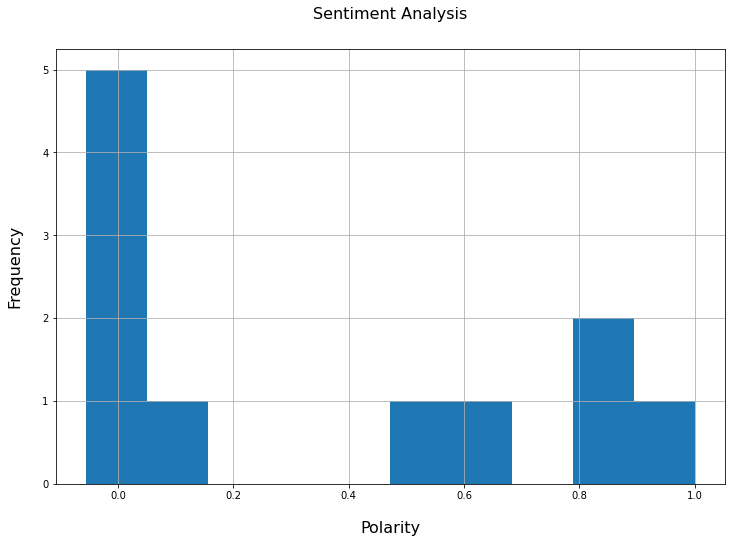

In [60]:

#matplotlib.pyplot is a state-based interface to matplotlib, and it allows a matlab-like way of plotting 
import matplotlib.pyplot as plt

plt.xlabel('Polarity' , fontsize=16 ,labelpad = 20)
plt.ylabel('ylabel' , fontsize=16 ,labelpad = 20)
plt.title('Sentiment Analysis', fontsize=16 , pad=30)


filtered_df['polarity'].plot(kind='hist' , figsize=(12,8) , grid = True)



In [46]:
#create df to plot polarity
data = {'Count':  [positive_tweets,
                  negative_tweets,
                  neutral_tweets]
       }

#calculate percentage
def percentage(count):
    
    percent = (count/500) * 100
    
    return percent


df_polarity = pd.DataFrame(data, index = ['Postive','Negative','Neutral'])

df_polarity['Percentage %'] = df_polarity['Count'].apply(percentage) 

df_polarity



,Count,Percentage %
Postive,16,3.2
Negative,4,0.8
Neutral,29,5.8


<AxesSubplot:title={'center':'Frequency Of Polarity'}, xlabel='Polarity', ylabel='Frequency'>

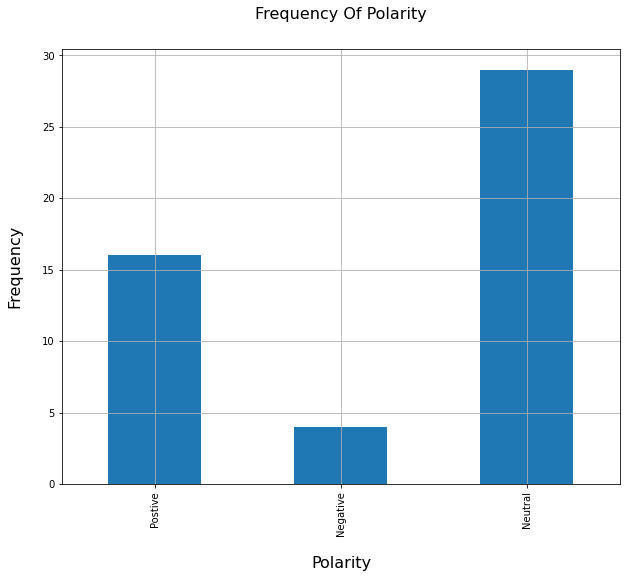

In [47]:
plt.xlabel('Polarity' , fontsize=16 ,labelpad = 20)
plt.ylabel('Frequency' , fontsize=16 ,labelpad = 20)
plt.title('Frequency Of Polarity', fontsize=16 , pad=30)
df_polarity['Count'].plot(kind = 'bar', figsize=(10,8) , grid = True)